                                       Part 1: Data scraping and preparation

Step 1: Scrape your competitor's data

first import the libraries then get url, parse it as html, read data, view content, get table in it then using pandas to read it, rename the columns name and show the results.

In [73]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
import requests
from bs4 import BeautifulSoup
from os import path

url = "https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares"
req = requests.get(url)
soup = BeautifulSoup(req.content ,"html.parser") 
prettyHTML = soup.prettify() 
tbl = soup.find("table",{"class":"table table-striped table-responsive-md"}) 
data_frame = pd.read_html(str(tbl))[0] 
data_frame = data_frame.rename(columns={'Unnamed: 0':'rank' , 'Unnamed: 1':'x_class' , 'Unnamed: 2':'date', 'Region':'region' , 'Start':'start_time' , 'Maximum':'max_time' , 'End':'end_time' , 'Unnamed: 7':'movie'}) 
data_frame

    

,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


Step 2: Tidy the top 50 solar flare data

first drop the last column then using "iterrows" to loop over dataframe and concatenate 2 columns in one and then put the new value using "set_value" then drop unused columns, and make sure that there isnot "-" in region by replacing it by "NaN" value using "replace", finally reindex the columns to get the new table and show the results. 

In [74]:
data_frame.drop(columns="movie", inplace = True)
for index, row in data_frame.iterrows():
    data_frame.set_value(index,"start_time",(row["date"]+" "+row["start_time"]))
    data_frame.set_value(index,"max_time",(row["date"]+" "+row["max_time"]))
    data_frame.set_value(index,"end_time",(row["date"]+" "+row["end_time"]))
data_frame.drop(columns="date", inplace=True)    
data_frame["region"].replace(to_replace='-', value="NaN", inplace=True)
data_frame=data_frame.reindex(columns=["rank","x_class","start_time","max_time","end_time","region"])
data_frame  

,rank,x_class,start_time,max_time,end_time,region
0,1,X28+,2003/11/04 19:29,2003/11/04 19:53,2003/11/04 20:06,486
1,2,X20+,2001/04/02 21:32,2001/04/02 21:51,2001/04/02 22:03,9393
2,3,X17.2+,2003/10/28 09:51,2003/10/28 11:10,2003/10/28 11:24,486
3,4,X17+,2005/09/07 17:17,2005/09/07 17:40,2005/09/07 18:03,808
4,5,X14.4,2001/04/15 13:19,2001/04/15 13:50,2001/04/15 13:55,9415
5,6,X10,2003/10/29 20:37,2003/10/29 20:49,2003/10/29 21:01,486
6,7,X9.4,1997/11/06 11:49,1997/11/06 11:55,1997/11/06 12:01,8100
7,8,X9.3,2017/09/06 11:53,2017/09/06 12:02,2017/09/06 12:10,2673
8,9,X9,2006/12/05 10:18,2006/12/05 10:35,2006/12/05 10:45,930
9,10,X8.3,2003/11/02 17:03,2003/11/02 17:25,2003/11/02 17:39,486


Step 3: Scrape the NASA data

first get the url, read the content, get table we need then split the content into lines and remove unnecessary lines, create dataframe of table with it's columns names and split each line by space to remove unnecessary data, drop unnecessary columns, rename some columns.

In [75]:
url2 = "https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"
req2 = requests.get(url2)
soup2 = BeautifulSoup(req2.content ,"html5lib") 
tbl2 = soup2.find('pre')
content = tbl2.get_text()
rm = 0
l = content.split('\n')
for i in range(0,3):
    l.pop(len(l)-1)  
for i in range(0,11):
    l.pop(0)
table = pd.DataFrame(columns=['Start_Date', 'Start_Time', 'End_Date', 'End_Time', 'Start_Frequency', 'End_Frequency', 'Flare_Location', 'Flare_Region','Flare_Classification', 'CME_Date', 'CME_Time', 'CME_Angle', 'CME_Width', 'CME_Speed'], index = range(0,len(l)))
for ll in l:
    cols = ll.split(' ')
    while '' in cols:
        cols.remove('')
    cm = 0
    while cm < 14:
        table.iat[rm, cm] = cols[cm]
        cm += 1
    rm += 1
#table.drop(columns="CME_Width", inplace=True)  
#table.drop(columns="CME_Speed", inplace=True)
table = table.rename(columns={'Flare_Classification':'Importance' , 'CME_Angle':'CPA'})
table.to_csv(r'C:\Users\bedo\Desktop\DS Labs\NASA.csv', index = False) 
table


,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,CME_Time,CPA,CME_Width,CME_Speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441


Step 4: Tidy the NASA table

first replacing missing records(dashes) with "NaN", create new table called "Is_halo" and mapping it to "CPA" table and put "True" value if there is "Halo" value else put "false" value, then replace any "Halo" value by "Na" value, create new table called "Width_Lower_Bound" and mapping it to "CME_Width" table and put "True" value if there is ">" sign else "false" value , create new function check if value is numeric or not in "CME_Width" column and if it isnot a numeric value replace it by "" else "no change", then using "iterrows" to loop over dataframe and concatenate 2 columns in one and then put the new value using "set_value" then drop unused columns, finally rename the columns name and show the results.

In [76]:
table.replace(to_replace='------', value="NaN", inplace=True)
table.replace(to_replace='-----', value="NaN", inplace=True)
table.replace(to_replace='----', value="NaN", inplace=True)
table.replace(to_replace='---', value="NaN", inplace=True)
table.replace(to_replace='--/--', value="NaN", inplace=True)
table.replace(to_replace='--:--', value="NaN", inplace=True)

# is_halo = [False]*len(table)
# table['Is_halo']= is_halo
# table.loc[table['CPA'] == 'Halo', 'Is_halo'] = True

table['Is_halo'] = table['CPA'].map(lambda x: True if x == 'Halo' else False)

table["CPA"].replace(to_replace='Halo', value="Na", inplace=True)

table['Width_Lower_Bound'] = table['CME_Width'].map(lambda x: str(x)[0] == '>')

table['CME_Width'] = table.CME_Width.str.replace(r">",'')

for index, row in table.iterrows():
    table.set_value(index,"Start_Date",(row["Start_Date"]+" "+row["Start_Time"]))
    table.set_value(index,"End_Date",(row["End_Date"]+" "+row["End_Time"]))
    table.set_value(index,"CME_Date",(row["CME_Date"]+" "+row["CME_Time"]))
table.drop(columns="Start_Time", inplace=True)  
table.drop(columns="End_Time", inplace=True)  
table.drop(columns="CME_Time", inplace=True)  

table = table.rename(columns={'Start_Date':'Start_DateTime' , 'End_Date':'End_DateTime' , 'CME_Date':'CME_DateTime'})
#table.to_csv(r'C:\Users\bedo\Desktop\DS Labs\NASA2.csv', index = False) 
table

,Start_DateTime,End_DateTime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_DateTime,CPA,CME_Width,CME_Speed,Is_halo,Width_Lower_Bound
0,1997/04/01 14:00,04/01 14:15,8000,4000,S25E16,8026,M1.3,04/01 15:18,74,79,312,False,False
1,1997/04/07 14:30,04/07 17:30,11000,1000,S28E19,8027,C6.8,04/07 14:27,Na,360,878,True,False
2,1997/05/12 05:15,05/14 16:00,12000,80,N21W08,8038,C1.3,05/12 05:30,Na,360,464,True,False
3,1997/05/21 20:20,05/21 22:00,5000,500,N05W12,8040,M1.3,05/21 21:00,263,165,296,False,False
4,1997/09/23 21:53,09/23 22:16,6000,2000,S29E25,8088,C1.4,09/23 22:02,133,155,712,False,False
5,1997/11/03 05:15,11/03 12:00,14000,250,S20W13,8100,C8.6,11/03 05:28,240,109,227,False,False
6,1997/11/03 10:30,11/03 11:30,14000,5000,S16W21,8100,M4.2,11/03 11:11,233,122,352,False,False
7,1997/11/04 06:00,11/05 04:30,14000,100,S14W33,8100,X2.1,11/04 06:10,Na,360,785,True,False
8,1997/11/06 12:20,11/07 08:30,14000,100,S18W63,8100,X9.4,11/06 12:10,Na,360,1556,True,False
9,1997/11/27 13:30,11/27 14:00,14000,7000,N17E63,8113,X2.6,11/27 13:56,98,91,441,False,False


                                                  Part 2: Analysis


Question 1: Replication

fisrt get the rows contain "X" value, remove "X" symbol to get only numbers then convert them into float to compare them, sort the numbers by descending, then convert them into string again and concatenate "X" to them and show the results.

ANS:
so we can replicate the top 50 solar flare table in SpaceWeatherLive.com exactly using the data obtained from NASA since column "Importance" strongly looks like "x_cLass" so we can extracted the top 50 solar flare by their importance.


In [77]:
tf = table.loc[table['Importance'].str.contains('X')]
tf['Importance']= tf.Importance.str.replace(r"X",'')
tf['Importance'] = tf['Importance'].map(float)
tf.sort_values('Importance',inplace=True, ascending = False)
tf['Importance'] = "X" + tf['Importance'].map(str)
tf = tf.head(50)
tf

,Start_DateTime,End_DateTime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_DateTime,CPA,CME_Width,CME_Speed,Is_halo,Width_Lower_Bound
240,2003/11/04 20:00,11/04 24:00,10000,200,S19W83,10486,X28.0,11/04 19:54,Na,360,2657,True,False
117,2001/04/02 22:05,04/03 02:30,14000,250,N19W72,9393,X20.0,04/02 22:06,261,244,2505,False,False
233,2003/10/28 11:10,10/29 24:00,14000,40,S16E08,10486,X17.0,10/28 11:30,Na,360,2459,True,False
126,2001/04/15 14:05,04/16 13:00,14000,40,S20W85,9415,X14.0,04/15 14:06,245,167,1199,False,False
234,2003/10/29 20:55,10/29 24:00,11000,500,S15W02,10486,X10.0,10/29 20:54,Na,360,2029,True,False
8,1997/11/06 12:20,11/07 08:30,14000,100,S18W63,8100,X9.4,11/06 12:10,Na,360,1556,True,False
514,2017/09/06 12:05,09/07 08:00,16000,70,S08W33,12673,X9.3,09/06 12:24,Na,360,1571,True,False
328,2006/12/05 10:50,12/05 20:00,14000,250,S07E68,10930,X9.0,NaN NaN,NaN,NaN,NaN,False,False
237,2003/11/02 17:30,11/03 01:00,12000,250,S14W56,10486,X8.3,11/02 17:30,Na,360,2598,True,False
515,2017/09/10 16:02,09/11 06:50,16000,150,S09W92,NaN,X8.3,09/10 16:00,Na,360,3163,True,False


Question 2: Integration

First save the 2 tables into new 2 tables and create new column called “Best_Match” and take index of NASA table then define function that take index as input then use “iterrowrs” to iterate over dataframe and check if  the“Flare_Classification”(CPA) in NASA table is same at “x_class” in space table if it’s return the rank value in the new column we created else return “NaN”, Finally call the function and iterate over column and put the rank in it, we have 29 rows matched.

In [78]:
tb1 = data_frame
tb2 = table
#tb2['Start_DateTime'] = tb2.Start_DateTime.str.replace(r" [0-9:0-9]*", '')
#tb1['start_time'] = tb1.start_time.str.replace(r" [0-9:0-9]*", '')
# l=tb2['Flare_Region'].values.tolist()
# newlst=[]
# for i in l:
#     if len(i)==4:
#         newlst.append(i)
#     elif len(i)==5:
#         newlst.append(i[1:])
# df1 = pd.DataFrame(newlst)
#bestmatch = ["NaN"]*len(tb2)
#tb2['Best_Match']= bestmatch 
tb2['Best_Match'] = pd.Series('NaN', index=tb2.index)
def indicate_rank(index):
    for i, row in tb1.iterrows(): 
        if tb2.iat[index,6] == row[1]:
             return row['rank']    
    return 'NaN'
for i, row in tb2.iterrows():
    t = indicate_rank(i)
    tb2.iat[i, 13] = t  
tb2
# tb2.to_csv(r'C:\Users\bedo\Desktop\DS Labs\NASA3.csv', index = False)

,Start_DateTime,End_DateTime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_DateTime,CPA,CME_Width,CME_Speed,Is_halo,Width_Lower_Bound,Best_Match
0,1997/04/01 14:00,04/01 14:15,8000,4000,S25E16,8026,M1.3,04/01 15:18,74,79,312,False,False,NaN
1,1997/04/07 14:30,04/07 17:30,11000,1000,S28E19,8027,C6.8,04/07 14:27,Na,360,878,True,False,NaN
2,1997/05/12 05:15,05/14 16:00,12000,80,N21W08,8038,C1.3,05/12 05:30,Na,360,464,True,False,NaN
3,1997/05/21 20:20,05/21 22:00,5000,500,N05W12,8040,M1.3,05/21 21:00,263,165,296,False,False,NaN
4,1997/09/23 21:53,09/23 22:16,6000,2000,S29E25,8088,C1.4,09/23 22:02,133,155,712,False,False,NaN
5,1997/11/03 05:15,11/03 12:00,14000,250,S20W13,8100,C8.6,11/03 05:28,240,109,227,False,False,NaN
6,1997/11/03 10:30,11/03 11:30,14000,5000,S16W21,8100,M4.2,11/03 11:11,233,122,352,False,False,NaN
7,1997/11/04 06:00,11/05 04:30,14000,100,S14W33,8100,X2.1,11/04 06:10,Na,360,785,True,False,NaN
8,1997/11/06 12:20,11/07 08:30,14000,100,S18W63,8100,X9.4,11/06 12:10,Na,360,1556,True,False,7
9,1997/11/27 13:30,11/27 14:00,14000,7000,N17E63,8113,X2.6,11/27 13:56,98,91,441,False,False,49


Question 3: Analysis

Solution 2: initialize 4 values equals zero for "top true", "top false", "all true", "all false" then use iterrows to iterate over the 2 tables(top flare data, NASA data) and count number of true and false values, create an 3x3 array to save the counts
and create dataframe of it, convert them into integer, finally use matplotlip to plot the bar.  

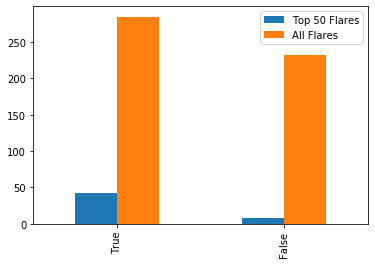

In [79]:
# tf['Year']=[d.split('/')[0] for d in tf.Start_DateTime]
# tf['Month']=[d.split('/')[1] for d in tf.Start_DateTime]
# tf['Day']=[d.split('/')[2] for d in tf.Start_DateTime]

#plt.plot(x = tf['Year'], y = tf['Start_Frequency'])

#ax = tf.plot.scatter(x='Year', y='Start_Frequency')

tt = 0
ft = 0 
ta = 0 
fa = 0

for index, row in table.iterrows():
    if row['Is_halo']:
        ta = ta + 1 
    else:
        fa = fa + 1
        
for index, row in tf.iterrows():
    if row['Is_halo']:
        tt = tt + 1 
    else:
        ft = ft + 1

d = np.array([['','Top 50 Flares','All Flares'], [True, tt, ta], [False, ft, fa]])

df1 = pd.DataFrame(data=d[1:,1:], index=d[1:,0], columns=d[0,1:])

df1['All Flares'] = df1['All Flares'].map(int)
df1['Top 50 Flares'] = df1['Top 50 Flares'].map(int)

df1.plot.bar()

